### Metrics - Accuracy

In [1]:
import numpy as np
import os
import cv2
from tqdm import tqdm
import seaborn as sns; sns.set()

In [11]:

dirname = "F:\desk\datascience\hse\kaggle\ML_track_train"

Xtrain, ytrain = [], []

for fname in tqdm(os.listdir(dirname)):
    img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)
    ytrain.append(int(fname.split('label')[1].split('.png')[0]))
        
    Xtrain.append(img)

len(Xtrain), len(ytrain)

100%|██████████| 313/313 [00:00<00:00, 4411.21it/s]


(313, 313)

In [3]:
def sort_by_index(fname):
    return int(fname.split('.')[0].split('image')[1])

In [20]:
dirname = "F:\desk\datascience\hse\kaggle\ML_track_test"

Xtest = []
Names = []

for fname in tqdm(sorted(os.listdir(dirname), key=sort_by_index)):
    img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)
    Names.append(fname)
        
    Xtest.append(img)

len(Xtest)

100%|██████████| 2090/2090 [00:00<00:00, 4596.19it/s]


2090

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


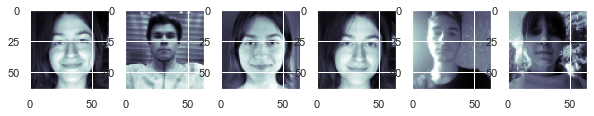

In [5]:
from matplotlib import pylab as plt
%pylab inline

fig, axx = plt.subplots(1, 6, figsize=(10, 5))

for i in range(6):
    img = Xtrain[i]
    axx[i].imshow(img, cmap='bone') 

### CROP

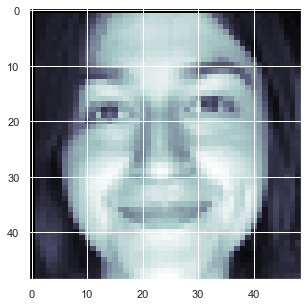

In [12]:
img0 = Xtrain[0]

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
face = face_cascade.detectMultiScale(img0)
for (a, b, w, h) in face:
    cv2.rectangle(img0, (a, b), (a+w, b+h), (0, 0, 255), 0)
    face = img0[b:b + h, a:a + w]

fig, axx = plt.subplots(1, 1, figsize=(10, 5))
img = face
axx.imshow(img, cmap='bone')

In [13]:
dirname = "F:\desk\datascience\hse\kaggle\ML_track_train"

x_train_crop = []

Crop = True


for fname in tqdm(os.listdir(dirname)):
    img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)

    if Crop is True:
        
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
        face = face_cascade.detectMultiScale(img)
        for (a, b, w, h) in face:
            cv2.rectangle(img, (a, b), (a+w, b+h), (0, 0, 255), 0)
            face = img[b:b + h, a:a + w]
    else:
        face = img


    try:
        h, w = face.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)
        
        img = face[h0: h0 + size, w0: w0 + size]
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
        x_train_crop.append(img)
    except:
        x_train_crop.append(img)
        print(f'no face found for {fname}')
len(x_train_crop)

  5%|▍         | 15/313 [00:00<00:06, 43.80it/s]

no face found for image107_label0.png


 10%|▉         | 30/313 [00:00<00:06, 44.22it/s]

no face found for image11_label6.png
no face found for image125_label1.png


 14%|█▍        | 45/313 [00:01<00:06, 44.60it/s]

no face found for image134_label0.png
no face found for image140_label6.png


 19%|█▉        | 60/313 [00:01<00:05, 44.46it/s]

no face found for image145_label7.png
no face found for image149_label1.png
no face found for image150_label1.png


 21%|██        | 65/313 [00:01<00:05, 43.68it/s]

no face found for image154_label1.png
no face found for image156_label6.png
no face found for image15_label0.png


 24%|██▍       | 75/313 [00:01<00:05, 43.69it/s]

no face found for image162_label6.png
no face found for image16_label1.png


 29%|██▉       | 90/313 [00:02<00:05, 43.82it/s]

no face found for image177_label1.png
no face found for image17_label9.png


 32%|███▏      | 100/313 [00:02<00:04, 43.39it/s]

no face found for image185_label1.png
no face found for image189_label6.png


 38%|███▊      | 120/313 [00:02<00:04, 42.88it/s]

no face found for image201_label0.png
no face found for image206_label6.png
no face found for image208_label0.png
no face found for image209_label6.png


 43%|████▎     | 135/313 [00:03<00:04, 43.69it/s]

no face found for image214_label1.png
no face found for image215_label6.png
no face found for image216_label7.png
no face found for image221_label0.png


 46%|████▋     | 145/313 [00:03<00:04, 40.46it/s]

no face found for image223_label1.png
no face found for image226_label1.png


 50%|████▉     | 155/313 [00:03<00:03, 42.09it/s]

no face found for image234_label9.png
no face found for image240_label6.png
no face found for image241_label1.png


 54%|█████▍    | 170/313 [00:03<00:03, 42.37it/s]

no face found for image245_label1.png
no face found for image251_label6.png


 58%|█████▊    | 180/313 [00:04<00:03, 43.02it/s]

no face found for image258_label1.png


 61%|██████    | 190/313 [00:04<00:02, 43.12it/s]

no face found for image266_label5.png


 64%|██████▍   | 200/313 [00:04<00:02, 43.11it/s]

no face found for image276_label6.png
no face found for image280_label6.png
no face found for image282_label5.png


 69%|██████▊   | 215/313 [00:04<00:02, 43.99it/s]

no face found for image287_label6.png
no face found for image295_label0.png


 72%|███████▏  | 225/313 [00:05<00:01, 44.25it/s]

no face found for image297_label1.png
no face found for image299_label7.png
no face found for image301_label8.png


 75%|███████▌  | 235/313 [00:05<00:01, 44.55it/s]

no face found for image304_label1.png
no face found for image311_label9.png


 80%|███████▉  | 250/313 [00:05<00:01, 44.76it/s]

no face found for image38_label6.png
no face found for image41_label0.png


 85%|████████▍ | 265/313 [00:06<00:01, 44.67it/s]

no face found for image49_label0.png
no face found for image4_label5.png
no face found for image50_label6.png
no face found for image56_label7.png


 88%|████████▊ | 275/313 [00:06<00:00, 44.46it/s]

no face found for image58_label9.png
no face found for image63_label0.png


 96%|█████████▌| 300/313 [00:06<00:00, 44.57it/s]

no face found for image80_label1.png
no face found for image85_label1.png


 99%|█████████▉| 310/313 [00:07<00:00, 44.34it/s]

no face found for image90_label6.png
no face found for image98_label0.png


100%|██████████| 313/313 [00:07<00:00, 43.64it/s]

no face found for image9_label7.png


313

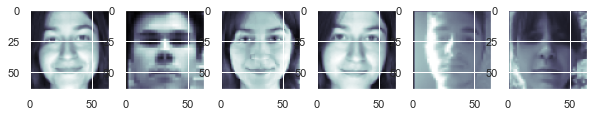

In [18]:
fig, axx = plt.subplots(1, 6, figsize=(10, 5))

for i in range(6):
    img = x_train_crop[i]
    axx[i].imshow(img, cmap='bone') 

In [21]:
dirname = "F:\desk\datascience\hse\kaggle\ML_track_test"

x_test_crop = []

Crop = True


for fname in tqdm(sorted(os.listdir(dirname), key=sort_by_index)):
    img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)

    if Crop is True:
        
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
        face = face_cascade.detectMultiScale(img)
        for (a, b, w, h) in face:
            cv2.rectangle(img, (a, b), (a+w, b+h), (0, 0, 255), 0)
            face = img[b:b + h, a:a + w]
    else:
        face = img


    try:
        h, w = face.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)
        
        img = face[h0: h0 + size, w0: w0 + size]
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
        x_test_crop.append(img)
    except:
        x_test_crop.append(img)
        print(f'no face found for {fname}')
len(x_test_crop)

  1%|          | 14/2090 [00:00<00:47, 43.34it/s]

no face found for image8.png
no face found for image10.png
no face found for image16.png


  1%|          | 24/2090 [00:00<00:46, 44.20it/s]

no face found for image19.png
no face found for image20.png
no face found for image24.png


  2%|▏         | 39/2090 [00:00<00:46, 44.34it/s]

no face found for image31.png
no face found for image32.png
no face found for image38.png
no face found for image39.png
no face found for image40.png


  3%|▎         | 54/2090 [00:01<00:46, 43.77it/s]

no face found for image45.png
no face found for image50.png
no face found for image51.png


  3%|▎         | 64/2090 [00:01<00:45, 44.43it/s]

no face found for image55.png
no face found for image58.png
no face found for image59.png
no face found for image61.png
no face found for image64.png


  4%|▎         | 74/2090 [00:01<00:46, 43.45it/s]

no face found for image65.png
no face found for image70.png


  4%|▍         | 84/2090 [00:01<00:45, 44.20it/s]

no face found for image78.png
no face found for image81.png
no face found for image87.png


  4%|▍         | 94/2090 [00:02<00:45, 44.17it/s]

no face found for image89.png
no face found for image95.png


  5%|▌         | 114/2090 [00:02<00:46, 42.62it/s]

no face found for image105.png
no face found for image111.png
no face found for image113.png


  6%|▌         | 119/2090 [00:02<00:46, 42.12it/s]

no face found for image114.png


  7%|▋         | 154/2090 [00:03<00:44, 43.32it/s]

no face found for image146.png
no face found for image148.png
no face found for image154.png


  8%|▊         | 164/2090 [00:03<00:44, 43.49it/s]

no face found for image156.png
no face found for image159.png


  8%|▊         | 174/2090 [00:03<00:43, 44.24it/s]

no face found for image167.png


  9%|▉         | 194/2090 [00:04<00:42, 44.58it/s]

no face found for image188.png
no face found for image191.png
no face found for image194.png


 10%|▉         | 204/2090 [00:04<00:41, 45.12it/s]

no face found for image197.png
no face found for image204.png


 10%|█         | 214/2090 [00:04<00:41, 45.18it/s]

no face found for image207.png
no face found for image212.png


 11%|█         | 224/2090 [00:05<00:41, 45.34it/s]

no face found for image218.png
no face found for image219.png
no face found for image223.png
no face found for image227.png


 11%|█▏        | 239/2090 [00:05<00:40, 45.71it/s]

no face found for image230.png
no face found for image231.png
no face found for image235.png
no face found for image238.png


 12%|█▏        | 249/2090 [00:05<00:40, 45.14it/s]

no face found for image242.png
no face found for image243.png


 12%|█▏        | 259/2090 [00:05<00:40, 44.90it/s]

no face found for image252.png
no face found for image253.png
no face found for image258.png
no face found for image260.png


 13%|█▎        | 269/2090 [00:06<00:40, 44.95it/s]

no face found for image263.png
no face found for image267.png


 14%|█▎        | 284/2090 [00:06<00:40, 44.62it/s]

no face found for image278.png
no face found for image279.png
no face found for image280.png


 14%|█▍        | 299/2090 [00:06<00:40, 43.89it/s]

no face found for image290.png
no face found for image291.png
no face found for image297.png
no face found for image298.png


 15%|█▍        | 309/2090 [00:06<00:40, 43.92it/s]

no face found for image300.png
no face found for image306.png


 16%|█▌        | 324/2090 [00:07<00:39, 44.25it/s]

no face found for image314.png
no face found for image316.png
no face found for image317.png


 16%|█▋        | 344/2090 [00:07<00:39, 44.60it/s]

no face found for image338.png
no face found for image339.png
no face found for image343.png
no face found for image345.png
no face found for image346.png


 17%|█▋        | 359/2090 [00:08<00:38, 45.16it/s]

no face found for image353.png
no face found for image361.png


 18%|█▊        | 369/2090 [00:08<00:38, 45.24it/s]

no face found for image362.png
no face found for image363.png
no face found for image368.png


 18%|█▊        | 379/2090 [00:08<00:37, 45.24it/s]

no face found for image373.png
no face found for image378.png
no face found for image380.png
no face found for image382.png


 19%|█▊        | 389/2090 [00:08<00:37, 45.36it/s]

no face found for image383.png
no face found for image389.png
no face found for image391.png


 19%|█▉        | 404/2090 [00:09<00:36, 45.60it/s]

no face found for image395.png
no face found for image396.png
no face found for image401.png
no face found for image403.png


 20%|██        | 419/2090 [00:09<00:37, 45.13it/s]

no face found for image413.png
no face found for image415.png
no face found for image419.png


 21%|██        | 429/2090 [00:09<00:36, 45.28it/s]

no face found for image423.png
no face found for image424.png
no face found for image430.png


 21%|██        | 444/2090 [00:09<00:36, 44.85it/s]

no face found for image439.png
no face found for image440.png
no face found for image447.png


 22%|██▏       | 459/2090 [00:10<00:37, 43.55it/s]

no face found for image454.png
no face found for image456.png
no face found for image458.png


 22%|██▏       | 469/2090 [00:10<00:37, 43.48it/s]

no face found for image464.png
no face found for image466.png
no face found for image471.png
no face found for image473.png


 23%|██▎       | 484/2090 [00:10<00:36, 43.60it/s]

no face found for image475.png


 24%|██▎       | 494/2090 [00:11<00:35, 44.62it/s]

no face found for image487.png


 24%|██▍       | 504/2090 [00:11<00:36, 43.99it/s]

no face found for image498.png
no face found for image501.png
no face found for image502.png
no face found for image504.png
no face found for image505.png


 25%|██▍       | 519/2090 [00:11<00:35, 44.65it/s]

no face found for image514.png
no face found for image520.png
no face found for image522.png


 26%|██▌       | 539/2090 [00:12<00:36, 42.06it/s]

no face found for image530.png
no face found for image533.png


 26%|██▌       | 544/2090 [00:12<00:36, 42.70it/s]

no face found for image539.png
no face found for image546.png


 27%|██▋       | 554/2090 [00:12<00:35, 43.25it/s]

no face found for image549.png
no face found for image551.png
no face found for image555.png


 27%|██▋       | 563/2090 [00:12<00:50, 30.26it/s]

no face found for image561.png
no face found for image562.png
no face found for image564.png


 27%|██▋       | 572/2090 [00:13<00:49, 30.94it/s]

no face found for image565.png
no face found for image566.png
no face found for image567.png
no face found for image570.png


 28%|██▊       | 582/2090 [00:13<00:41, 36.03it/s]

no face found for image577.png
no face found for image582.png


 29%|██▊       | 597/2090 [00:13<00:36, 40.73it/s]

no face found for image588.png
no face found for image591.png
no face found for image597.png


 29%|██▉       | 607/2090 [00:14<00:34, 43.13it/s]

no face found for image600.png
no face found for image605.png
no face found for image609.png


 30%|██▉       | 617/2090 [00:14<00:33, 43.64it/s]

no face found for image611.png
no face found for image613.png
no face found for image615.png


 30%|███       | 632/2090 [00:14<00:33, 43.18it/s]

no face found for image623.png
no face found for image627.png


 31%|███       | 642/2090 [00:14<00:32, 44.17it/s]

no face found for image634.png
no face found for image635.png
no face found for image637.png
no face found for image643.png


 31%|███▏      | 657/2090 [00:15<00:32, 44.60it/s]

no face found for image648.png
no face found for image652.png
no face found for image655.png
no face found for image656.png


 32%|███▏      | 667/2090 [00:15<00:31, 45.02it/s]

no face found for image657.png
no face found for image665.png


 32%|███▏      | 677/2090 [00:15<00:31, 45.12it/s]

no face found for image667.png
no face found for image668.png
no face found for image675.png


 33%|███▎      | 687/2090 [00:15<00:30, 45.34it/s]

no face found for image680.png
no face found for image682.png
no face found for image684.png
no face found for image686.png
no face found for image688.png


 33%|███▎      | 697/2090 [00:16<00:31, 44.79it/s]

no face found for image689.png
no face found for image691.png
no face found for image696.png


 34%|███▍      | 707/2090 [00:16<00:30, 44.85it/s]

no face found for image701.png
no face found for image705.png


 35%|███▍      | 722/2090 [00:16<00:30, 44.95it/s]

no face found for image714.png
no face found for image715.png
no face found for image721.png


 36%|███▌      | 742/2090 [00:17<00:30, 44.42it/s]

no face found for image735.png
no face found for image737.png


 36%|███▌      | 752/2090 [00:17<00:30, 44.43it/s]

no face found for image748.png
no face found for image749.png
no face found for image752.png


 37%|███▋      | 767/2090 [00:17<00:30, 43.90it/s]

no face found for image759.png
no face found for image762.png
no face found for image767.png


 37%|███▋      | 782/2090 [00:17<00:29, 44.92it/s]

no face found for image775.png
no face found for image777.png
no face found for image778.png
no face found for image779.png


 38%|███▊      | 792/2090 [00:18<00:29, 44.72it/s]

no face found for image784.png
no face found for image787.png


 38%|███▊      | 802/2090 [00:18<00:29, 44.01it/s]

no face found for image797.png
no face found for image803.png


 39%|███▉      | 817/2090 [00:18<00:28, 45.05it/s]

no face found for image808.png
no face found for image810.png
no face found for image811.png


 40%|███▉      | 827/2090 [00:18<00:27, 45.39it/s]

no face found for image819.png
no face found for image822.png
no face found for image824.png


 40%|████      | 837/2090 [00:19<00:28, 44.54it/s]

no face found for image829.png
no face found for image836.png


 41%|████      | 852/2090 [00:19<00:28, 43.57it/s]

no face found for image844.png
no face found for image847.png


 41%|████      | 862/2090 [00:19<00:28, 43.29it/s]

no face found for image856.png
no face found for image859.png
no face found for image861.png


 42%|████▏     | 872/2090 [00:20<00:28, 42.79it/s]

no face found for image865.png
no face found for image867.png
no face found for image872.png
no face found for image873.png


 42%|████▏     | 882/2090 [00:20<00:27, 43.59it/s]

no face found for image874.png
no face found for image878.png


 43%|████▎     | 897/2090 [00:20<00:28, 41.33it/s]

no face found for image888.png
no face found for image890.png


 43%|████▎     | 902/2090 [00:20<00:28, 41.51it/s]

no face found for image897.png
no face found for image901.png


 44%|████▎     | 912/2090 [00:20<00:27, 42.12it/s]

no face found for image906.png
no face found for image909.png
no face found for image911.png


 44%|████▍     | 917/2090 [00:21<00:27, 42.74it/s]

no face found for image917.png
no face found for image919.png


 44%|████▍     | 927/2090 [00:21<00:32, 35.60it/s]

no face found for image921.png
no face found for image922.png
no face found for image924.png
no face found for image929.png


 45%|████▍     | 937/2090 [00:21<00:29, 38.86it/s]

no face found for image930.png
no face found for image936.png
no face found for image937.png


 45%|████▌     | 947/2090 [00:21<00:28, 40.75it/s]

no face found for image941.png
no face found for image946.png
no face found for image949.png


 46%|████▌     | 962/2090 [00:22<00:26, 41.79it/s]

no face found for image954.png
no face found for image956.png
no face found for image962.png


 47%|████▋     | 972/2090 [00:22<00:26, 42.54it/s]

no face found for image963.png
no face found for image970.png


 47%|████▋     | 982/2090 [00:22<00:26, 42.42it/s]

no face found for image973.png
no face found for image975.png
no face found for image979.png
no face found for image981.png


 47%|████▋     | 987/2090 [00:22<00:25, 42.74it/s]

no face found for image984.png
no face found for image987.png


 48%|████▊     | 1002/2090 [00:23<00:27, 39.61it/s]

no face found for image993.png
no face found for image996.png
no face found for image998.png
no face found for image1001.png


 48%|████▊     | 1012/2090 [00:23<00:32, 33.10it/s]

no face found for image1009.png
no face found for image1012.png


 49%|████▉     | 1021/2090 [00:23<00:31, 33.93it/s]

no face found for image1016.png
no face found for image1018.png
no face found for image1019.png
no face found for image1021.png
no face found for image1023.png


 49%|████▉     | 1031/2090 [00:24<00:27, 37.92it/s]

no face found for image1025.png
no face found for image1028.png
no face found for image1029.png
no face found for image1031.png


 50%|█████     | 1046/2090 [00:24<00:25, 40.75it/s]

no face found for image1040.png


 51%|█████     | 1066/2090 [00:24<00:23, 43.01it/s]

no face found for image1058.png
no face found for image1065.png


 51%|█████▏    | 1076/2090 [00:25<00:23, 43.64it/s]

no face found for image1070.png
no face found for image1073.png


 52%|█████▏    | 1091/2090 [00:25<00:22, 43.75it/s]

no face found for image1083.png
no face found for image1085.png
no face found for image1090.png


 53%|█████▎    | 1101/2090 [00:25<00:22, 44.50it/s]

no face found for image1093.png
no face found for image1095.png
no face found for image1100.png
no face found for image1102.png


 53%|█████▎    | 1116/2090 [00:25<00:21, 45.05it/s]

no face found for image1109.png
no face found for image1111.png
no face found for image1112.png


 54%|█████▍    | 1131/2090 [00:26<00:21, 45.18it/s]

no face found for image1122.png
no face found for image1123.png
no face found for image1124.png


 55%|█████▍    | 1141/2090 [00:26<00:20, 45.28it/s]

no face found for image1131.png
no face found for image1139.png
no face found for image1140.png


 55%|█████▌    | 1151/2090 [00:26<00:20, 45.05it/s]

no face found for image1142.png
no face found for image1149.png
no face found for image1151.png


 55%|█████▌    | 1156/2090 [00:26<00:21, 44.22it/s]

no face found for image1152.png
no face found for image1156.png
no face found for image1157.png


 56%|█████▌    | 1171/2090 [00:27<00:21, 43.12it/s]

no face found for image1167.png
no face found for image1168.png
no face found for image1170.png


 57%|█████▋    | 1196/2090 [00:27<00:20, 44.40it/s]

no face found for image1186.png
no face found for image1187.png
no face found for image1189.png
no face found for image1193.png
no face found for image1194.png
no face found for image1195.png


 58%|█████▊    | 1206/2090 [00:28<00:19, 44.45it/s]

no face found for image1196.png
no face found for image1202.png
no face found for image1203.png
no face found for image1205.png


 58%|█████▊    | 1211/2090 [00:28<00:20, 42.80it/s]

no face found for image1206.png
no face found for image1207.png
no face found for image1209.png
no face found for image1211.png
no face found for image1212.png
no face found for image1213.png
no face found for image1214.png


 59%|█████▉    | 1230/2090 [00:28<00:22, 38.82it/s]

no face found for image1224.png
no face found for image1227.png
no face found for image1229.png


 59%|█████▉    | 1238/2090 [00:28<00:23, 36.83it/s]

no face found for image1232.png
no face found for image1238.png
no face found for image1239.png


 60%|██████    | 1258/2090 [00:29<00:20, 41.22it/s]

no face found for image1249.png
no face found for image1254.png
no face found for image1257.png


 60%|██████    | 1263/2090 [00:29<00:19, 41.47it/s]

no face found for image1258.png


 61%|██████    | 1273/2090 [00:29<00:19, 41.91it/s]

no face found for image1267.png
no face found for image1275.png


 61%|██████▏   | 1283/2090 [00:29<00:18, 42.82it/s]

no face found for image1276.png
no face found for image1277.png
no face found for image1280.png
no face found for image1283.png


 62%|██████▏   | 1293/2090 [00:30<00:18, 42.92it/s]

no face found for image1287.png
no face found for image1288.png
no face found for image1292.png
no face found for image1294.png


 62%|██████▏   | 1303/2090 [00:30<00:18, 42.65it/s]

no face found for image1297.png
no face found for image1300.png


 63%|██████▎   | 1318/2090 [00:30<00:17, 43.19it/s]

no face found for image1311.png
no face found for image1313.png
no face found for image1318.png


 64%|██████▎   | 1328/2090 [00:30<00:17, 42.38it/s]

no face found for image1320.png
no face found for image1325.png
no face found for image1326.png
no face found for image1328.png


 64%|██████▍   | 1343/2090 [00:31<00:18, 41.32it/s]

no face found for image1338.png
no face found for image1340.png


 65%|██████▍   | 1353/2090 [00:31<00:17, 41.51it/s]

no face found for image1347.png


 65%|██████▌   | 1368/2090 [00:31<00:17, 41.29it/s]

no face found for image1359.png
no face found for image1361.png
no face found for image1366.png


 66%|██████▌   | 1373/2090 [00:32<00:17, 41.93it/s]

no face found for image1368.png
no face found for image1371.png


 66%|██████▌   | 1383/2090 [00:32<00:16, 42.27it/s]

no face found for image1376.png
no face found for image1380.png
no face found for image1384.png


 67%|██████▋   | 1398/2090 [00:32<00:16, 42.37it/s]

no face found for image1391.png
no face found for image1393.png
no face found for image1394.png
no face found for image1396.png
no face found for image1397.png


 68%|██████▊   | 1418/2090 [00:33<00:16, 41.92it/s]

no face found for image1409.png
no face found for image1413.png


 68%|██████▊   | 1423/2090 [00:33<00:15, 42.38it/s]

no face found for image1420.png
no face found for image1421.png
no face found for image1425.png


 69%|██████▉   | 1443/2090 [00:33<00:16, 40.29it/s]

no face found for image1434.png
no face found for image1438.png


 70%|██████▉   | 1453/2090 [00:34<00:15, 41.04it/s]

no face found for image1446.png
no face found for image1450.png
no face found for image1451.png
no face found for image1452.png


 70%|███████   | 1463/2090 [00:34<00:15, 41.56it/s]

no face found for image1457.png
no face found for image1459.png


 70%|███████   | 1473/2090 [00:34<00:14, 41.89it/s]

no face found for image1466.png
no face found for image1467.png
no face found for image1469.png
no face found for image1471.png


 71%|███████   | 1483/2090 [00:34<00:14, 42.12it/s]

no face found for image1475.png
no face found for image1477.png
no face found for image1478.png
no face found for image1480.png
no face found for image1481.png


 71%|███████▏  | 1493/2090 [00:34<00:14, 42.04it/s]

no face found for image1486.png
no face found for image1487.png
no face found for image1490.png
no face found for image1491.png


 72%|███████▏  | 1508/2090 [00:35<00:13, 43.31it/s]

no face found for image1501.png
no face found for image1502.png
no face found for image1504.png
no face found for image1509.png
no face found for image1510.png

 73%|███████▎  | 1518/2090 [00:35<00:13, 43.30it/s]


no face found for image1515.png
no face found for image1518.png


 73%|███████▎  | 1528/2090 [00:35<00:13, 42.12it/s]

no face found for image1522.png
no face found for image1523.png
no face found for image1527.png


 74%|███████▎  | 1538/2090 [00:36<00:13, 41.64it/s]

no face found for image1533.png
no face found for image1534.png
no face found for image1538.png


 74%|███████▍  | 1548/2090 [00:36<00:12, 42.27it/s]

no face found for image1542.png
no face found for image1545.png
no face found for image1549.png


 75%|███████▍  | 1563/2090 [00:36<00:12, 43.74it/s]

no face found for image1555.png
no face found for image1556.png
no face found for image1563.png
no face found for image1564.png


 75%|███████▌  | 1573/2090 [00:36<00:11, 44.41it/s]

no face found for image1565.png
no face found for image1568.png
no face found for image1569.png
no face found for image1570.png
no face found for image1571.png
no face found for image1572.png
no face found for image1573.png


 76%|███████▌  | 1583/2090 [00:37<00:12, 42.20it/s]

no face found for image1576.png
no face found for image1579.png
no face found for image1580.png
no face found for image1583.png


 76%|███████▌  | 1593/2090 [00:37<00:12, 38.33it/s]

no face found for image1587.png
no face found for image1588.png
no face found for image1589.png


 77%|███████▋  | 1603/2090 [00:37<00:12, 39.74it/s]

no face found for image1596.png
no face found for image1599.png
no face found for image1600.png
no face found for image1601.png
no face found for image1602.png


 77%|███████▋  | 1613/2090 [00:37<00:11, 41.46it/s]

no face found for image1605.png
no face found for image1606.png
no face found for image1609.png
no face found for image1610.png
no face found for image1614.png


 78%|███████▊  | 1628/2090 [00:38<00:10, 43.32it/s]

no face found for image1618.png
no face found for image1621.png
no face found for image1622.png


 78%|███████▊  | 1638/2090 [00:38<00:10, 43.39it/s]

no face found for image1630.png
no face found for image1633.png
no face found for image1638.png


 79%|███████▉  | 1648/2090 [00:38<00:10, 44.19it/s]

no face found for image1640.png
no face found for image1649.png


 79%|███████▉  | 1658/2090 [00:38<00:09, 43.74it/s]

no face found for image1650.png


 80%|███████▉  | 1668/2090 [00:39<00:10, 41.39it/s]

no face found for image1661.png
no face found for image1664.png


 80%|████████  | 1678/2090 [00:39<00:09, 42.43it/s]

no face found for image1671.png
no face found for image1679.png


 81%|████████  | 1688/2090 [00:39<00:09, 43.21it/s]

no face found for image1683.png
no face found for image1689.png


 81%|████████  | 1698/2090 [00:39<00:09, 42.61it/s]

no face found for image1691.png
no face found for image1695.png
no face found for image1696.png
no face found for image1699.png


 82%|████████▏ | 1708/2090 [00:40<00:08, 43.02it/s]

no face found for image1701.png
no face found for image1702.png
no face found for image1708.png


 82%|████████▏ | 1718/2090 [00:40<00:08, 42.21it/s]

no face found for image1710.png
no face found for image1711.png
no face found for image1712.png


 83%|████████▎ | 1728/2090 [00:40<00:08, 41.83it/s]

no face found for image1719.png
no face found for image1721.png
no face found for image1723.png
no face found for image1724.png
no face found for image1727.png


 83%|████████▎ | 1738/2090 [00:40<00:08, 43.29it/s]

no face found for image1731.png
no face found for image1734.png
no face found for image1737.png
no face found for image1739.png


 84%|████████▍ | 1763/2090 [00:41<00:07, 41.94it/s]

no face found for image1754.png
no face found for image1760.png
no face found for image1761.png


 85%|████████▌ | 1778/2090 [00:41<00:07, 43.50it/s]

no face found for image1771.png
no face found for image1775.png
no face found for image1776.png
no face found for image1777.png
no face found for image1778.png
no face found for image1779.png


 86%|████████▌ | 1788/2090 [00:41<00:06, 43.82it/s]

no face found for image1781.png
no face found for image1789.png


 86%|████████▌ | 1798/2090 [00:42<00:06, 44.25it/s]

no face found for image1790.png


 87%|████████▋ | 1808/2090 [00:42<00:06, 44.82it/s]

no face found for image1803.png
no face found for image1805.png


 87%|████████▋ | 1823/2090 [00:42<00:05, 44.95it/s]

no face found for image1815.png
no face found for image1817.png
no face found for image1818.png
no face found for image1820.png


 88%|████████▊ | 1833/2090 [00:42<00:05, 44.45it/s]

no face found for image1825.png
no face found for image1826.png
no face found for image1831.png
no face found for image1833.png


 88%|████████▊ | 1843/2090 [00:43<00:05, 43.05it/s]

no face found for image1836.png
no face found for image1840.png
no face found for image1842.png


 89%|████████▊ | 1853/2090 [00:43<00:05, 42.38it/s]

no face found for image1847.png
no face found for image1848.png
no face found for image1851.png


 89%|████████▉ | 1863/2090 [00:43<00:05, 43.17it/s]

no face found for image1857.png


 90%|████████▉ | 1873/2090 [00:43<00:04, 43.96it/s]

no face found for image1867.png
no face found for image1870.png
no face found for image1871.png
no face found for image1874.png


 90%|█████████ | 1888/2090 [00:44<00:04, 44.64it/s]

no face found for image1878.png
no face found for image1879.png
no face found for image1883.png


 91%|█████████ | 1898/2090 [00:44<00:04, 45.19it/s]

no face found for image1888.png
no face found for image1890.png
no face found for image1897.png


 91%|█████████▏| 1908/2090 [00:44<00:04, 44.75it/s]

no face found for image1900.png
no face found for image1908.png


 92%|█████████▏| 1923/2090 [00:44<00:03, 44.65it/s]

no face found for image1914.png
no face found for image1919.png
no face found for image1920.png


 92%|█████████▏| 1933/2090 [00:45<00:03, 44.54it/s]

no face found for image1927.png
no face found for image1932.png


 93%|█████████▎| 1948/2090 [00:45<00:03, 44.02it/s]

no face found for image1940.png
no face found for image1942.png
no face found for image1944.png
no face found for image1945.png
no face found for image1948.png


 94%|█████████▎| 1958/2090 [00:45<00:03, 41.64it/s]

no face found for image1953.png
no face found for image1958.png


 94%|█████████▍| 1973/2090 [00:46<00:02, 41.43it/s]

no face found for image1966.png
no face found for image1970.png
no face found for image1972.png


 95%|█████████▍| 1983/2090 [00:46<00:02, 43.17it/s]

no face found for image1977.png
no face found for image1979.png


 96%|█████████▌| 1998/2090 [00:46<00:02, 44.45it/s]

no face found for image1989.png
no face found for image1997.png


 96%|█████████▌| 2003/2090 [00:46<00:01, 44.40it/s]

no face found for image1998.png
no face found for image2001.png
no face found for image2003.png


 97%|█████████▋| 2018/2090 [00:47<00:01, 44.54it/s]

no face found for image2010.png
no face found for image2011.png


 97%|█████████▋| 2033/2090 [00:47<00:01, 45.00it/s]

no face found for image2024.png
no face found for image2025.png
no face found for image2028.png
no face found for image2029.png


 98%|█████████▊| 2038/2090 [00:47<00:01, 45.27it/s]

no face found for image2033.png
no face found for image2034.png
no face found for image2036.png
no face found for image2037.png
no face found for image2040.png


 98%|█████████▊| 2053/2090 [00:47<00:00, 45.56it/s]

no face found for image2046.png
no face found for image2048.png
no face found for image2049.png
no face found for image2051.png
no face found for image2054.png


 99%|█████████▉| 2068/2090 [00:48<00:00, 45.48it/s]

no face found for image2059.png
no face found for image2060.png
no face found for image2067.png
no face found for image2068.png


100%|█████████▉| 2083/2090 [00:48<00:00, 45.16it/s]

no face found for image2076.png
no face found for image2078.png
no face found for image2082.png
no face found for image2084.png


100%|██████████| 2090/2090 [00:48<00:00, 42.92it/s]

no face found for image2087.png
no face found for image2088.png
no face found for image2089.png


2090

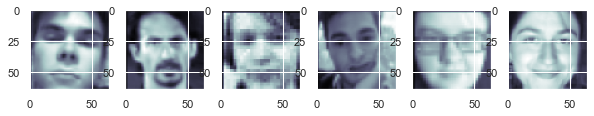

In [22]:
fig, axx = plt.subplots(1, 6, figsize=(10, 5))

for i in range(6):
    img = x_test_crop[i]
    axx[i].imshow(img, cmap='bone') 

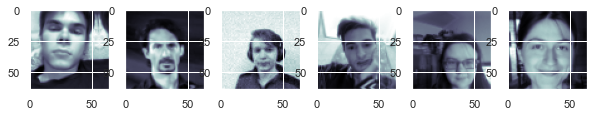

In [23]:
fig, axx = plt.subplots(1, 6, figsize=(10, 5))

for i in range(6):
    img = Xtest[i]
    axx[i].imshow(img, cmap='bone') 

In [24]:
x_train_crop_ravel = np.asarray([el.ravel() for el in x_train_crop])

In [25]:
x_train_crop_ravel[0]

array([ 0,  0,  0, ..., 45, 46, 49], dtype=uint8)

In [26]:
x_test_ravel = np.asarray([el.ravel() for el in x_test_crop])

## KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [44]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn_score = cross_validate(knn, x_train_crop_ravel, ytrain, return_train_score=True, cv=5, scoring = 'accuracy')

In [52]:
knn_data = pd.DataFrame(knn_score)
print('Accuracy_train:', np.mean(knn_data['train_score']))
print('Accuracy_test:', np.mean(knn_data['test_score']))

Accuracy_train: 0.6086278884462151
Accuracy_test: 0.5364567332309268


In [56]:
knn2 = KNeighborsClassifier()
gridknn = {'n_neighbors': np.linspace(1,50,50, dtype=int), 'p':[1, 2]}
knn_grid = GridSearchCV(knn2, gridknn, scoring='accuracy', return_train_score = True)
knn_grid.fit(x_train_crop_ravel, ytrain)
print('Best parameters', knn_grid.best_params_)
print('accuracy', knn_grid.best_score_)

Best parameters {'n_neighbors': 1, 'p': 1}
accuracy 0.6387608806963645


In [57]:
knn_results = pd.DataFrame(knn_grid.cv_results_)

In [68]:
knn_best = KNeighborsClassifier(n_neighbors = 3, p = 1)
knn_best.fit(x_train_crop_ravel, ytrain)
y_pred = knn_best.predict(x_test_ravel)

In [70]:
pred_df = pd.DataFrame(list(zip(Names, y_pred)), columns = ['img_name', 'pred_class'])

In [71]:
pred_df.to_csv("knn_submission.csv", index=False)

### LOGREG

In [27]:
from sklearn.linear_model import LogisticRegression

In [30]:
logreg = LogisticRegression(solver = 'lbfgs', max_iter=100, C = 0.00001, penalty = 'l2')
logreg_score = cross_validate(logreg, x_train_crop_ravel, ytrain, return_train_score=True, cv=5, scoring = 'accuracy')
logreg_data = pd.DataFrame(logreg_score)
print('Accuracy_train:', np.mean(logreg_data['train_score']))
print('Accuracy_test:', np.mean(logreg_data['test_score']))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy_train: 1.0
Accuracy_test: 0.7122375832053252


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
logreg.fit(x_train_crop_ravel, ytrain)
y_pred = logreg.predict(x_test_ravel)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
pred_df = pd.DataFrame(list(zip(Names, y_pred)), columns = ['img_name', 'pred_class'])

In [99]:
pred_df.to_csv("logreg_submission.csv", index=False)

### Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
tree = DecisionTreeClassifier(max_depth = 10, min_samples_split = 10)
tree_score = cross_validate(tree, x_train_crop_ravel, ytrain, return_train_score=True, cv=5, scoring = 'accuracy')
tree_data = pd.DataFrame(tree_score)
print('Accuracy_train:', np.mean(tree_data['train_score']))
print('Accuracy_test:', np.mean(tree_data['test_score']))

Accuracy_train: 0.8282741035856575
Accuracy_test: 0.43164362519201227


### SVM

In [115]:
from sklearn.svm import LinearSVC, SVC

In [130]:
svm = SVC(kernel = 'linear', C = 0.01, max_iter = 100)
svm_score = cross_validate(svm, x_train_crop_ravel, ytrain, return_train_score=True, cv=5, scoring = 'accuracy')
svm_data = pd.DataFrame(svm_score)
print('Accuracy_train:', np.mean(svm_data['train_score']))
print('Accuracy_test:', np.mean(svm_data['test_score']))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

Accuracy_train: 1.0
Accuracy_test: 0.6804915514592933


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [131]:
svm.fit(x_train_crop_ravel, ytrain)
y_pred = svm.predict(x_test_ravel)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [133]:
pred_df = pd.DataFrame(list(zip(Names, y_pred)), columns = ['img_name', 'pred_class'])

In [134]:
pred_df.to_csv("svm_submission.csv", index=False)

### RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
randomforest = RandomForestClassifier(criterion = 'entropy', n_estimators = 270)
rf_score = cross_validate(randomforest, x_train_crop_ravel, ytrain, return_train_score=True, cv=5, scoring = 'accuracy')
rf_data = pd.DataFrame(rf_score)
print('Accuracy_train:', np.mean(rf_data['train_score']))
print('Accuracy_test:', np.mean(rf_data['test_score']))

Accuracy_train: 1.0
Accuracy_test: 0.6864823348694317


In [61]:
randomforest.fit(x_train_crop_ravel, ytrain)
y_pred = randomforest.predict(x_test_ravel)

In [62]:
pred_df = pd.DataFrame(list(zip(Names, y_pred)), columns = ['img_name', 'pred_class'])

In [63]:
pred_df.to_csv("randomtree_submission.csv", index=False)

### GRAD BOO

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gradboo = GradientBoostingClassifier(n_estimators=200)
gradboo_score = cross_validate(gradboo, x_train_crop_ravel, ytrain, return_train_score=True, cv=5, scoring = 'accuracy')
gradboo_data = pd.DataFrame(gradboo_score)
print('Accuracy_train:', np.mean(gradboo_data['train_score']))
print('Accuracy_test:', np.mean(gradboo_data['test_score']))

KeyboardInterrupt: 

In [2]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.model_selection import cross_val_score
import hyperopt

In [3]:
cat = CatBoostClassifier(learning_rate = 0.1, max_depth = 3, n_estimators=300, min_data_in_leaf = 1)

In [87]:
cat_score = cross_validate(cat, x_train_crop_ravel, ytrain, return_train_score=True, cv=5, scoring = 'accuracy')
cat_data = pd.DataFrame(cat_score)
print('Accuracy_train:', np.mean(cat_data['train_score']))
print('Accuracy_test:', np.mean(cat_data['test_score']))

0:	learn: 2.2960887	total: 4.23s	remaining: 14m 1s
1:	learn: 2.2913831	total: 8.07s	remaining: 13m 18s
2:	learn: 2.2872238	total: 11.6s	remaining: 12m 43s
3:	learn: 2.2823255	total: 15.7s	remaining: 12m 48s
4:	learn: 2.2768887	total: 20.2s	remaining: 13m 9s
5:	learn: 2.2721031	total: 24.4s	remaining: 13m 9s
6:	learn: 2.2658522	total: 27.3s	remaining: 12m 31s
7:	learn: 2.2610099	total: 30.4s	remaining: 12m 10s
8:	learn: 2.2567917	total: 33.8s	remaining: 11m 57s
9:	learn: 2.2517828	total: 37.2s	remaining: 11m 47s
10:	learn: 2.2474037	total: 42.1s	remaining: 12m 3s
11:	learn: 2.2416769	total: 46.3s	remaining: 12m 6s
12:	learn: 2.2368411	total: 49.6s	remaining: 11m 53s
13:	learn: 2.2303604	total: 52.4s	remaining: 11m 35s
14:	learn: 2.2250396	total: 55.7s	remaining: 11m 27s
15:	learn: 2.2203890	total: 59.4s	remaining: 11m 23s
16:	learn: 2.2156898	total: 1m 2s	remaining: 11m 9s
17:	learn: 2.2107481	total: 1m 4s	remaining: 10m 54s
18:	learn: 2.2071242	total: 1m 6s	remaining: 10m 37s
19:	learn

155:	learn: 1.6515857	total: 11m 31s	remaining: 3m 15s
156:	learn: 1.6485605	total: 11m 37s	remaining: 3m 11s
157:	learn: 1.6454680	total: 11m 42s	remaining: 3m 6s
158:	learn: 1.6422308	total: 11m 46s	remaining: 3m 2s
159:	learn: 1.6391027	total: 11m 51s	remaining: 2m 57s
160:	learn: 1.6360089	total: 11m 56s	remaining: 2m 53s
161:	learn: 1.6319535	total: 12m 1s	remaining: 2m 49s
162:	learn: 1.6289988	total: 12m 6s	remaining: 2m 44s
163:	learn: 1.6254771	total: 12m 11s	remaining: 2m 40s
164:	learn: 1.6228836	total: 12m 16s	remaining: 2m 36s
165:	learn: 1.6197186	total: 12m 21s	remaining: 2m 31s
166:	learn: 1.6164276	total: 12m 26s	remaining: 2m 27s
167:	learn: 1.6132151	total: 12m 31s	remaining: 2m 23s
168:	learn: 1.6105974	total: 12m 35s	remaining: 2m 18s
169:	learn: 1.6075825	total: 12m 40s	remaining: 2m 14s
170:	learn: 1.6040206	total: 12m 45s	remaining: 2m 9s
171:	learn: 1.6017085	total: 12m 51s	remaining: 2m 5s
172:	learn: 1.5987222	total: 12m 56s	remaining: 2m 1s
173:	learn: 1.596

KeyboardInterrupt: 

In [89]:
cat.fit(x_train_crop_ravel, ytrain)
y_pred = cat.predict(x_test_ravel)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 2.2556221	total: 662ms	remaining: 3m 17s
1:	learn: 2.1982773	total: 1.26s	remaining: 3m 7s
2:	learn: 2.1573394	total: 1.78s	remaining: 2m 56s
3:	learn: 2.1243258	total: 2.29s	remaining: 2m 49s
4:	learn: 2.0898898	total: 2.8s	remaining: 2m 44s
5:	learn: 2.0333496	total: 3.3s	remaining: 2m 41s
6:	learn: 2.0042429	total: 3.79s	remaining: 2m 38s
7:	learn: 1.9804041	total: 4.29s	remaining: 2m 36s
8:	learn: 1.9369472	total: 4.78s	remaining: 2m 34s
9:	learn: 1.9009487	total: 5.28s	remaining: 2m 32s
10:	learn: 1.8814837	total: 5.77s	remaining: 2m 31s
11:	learn: 1.8568380	total: 6.27s	remaining: 2m 30s
12:	learn: 1.8261322	total: 6.84s	remaining: 2m 31s
13:	learn: 1.8010431	total: 7.39s	remaining: 2m 30s
14:	learn: 1.7793870	total: 7.91s	remaining: 2m 30s
15:	learn: 1.7612077	total: 8.47s	remaining: 2m 30s
16:	learn: 1.7381198	total: 9.03s	remaining: 2m 30s
17:	learn: 1.7168659	total: 9.57s	remaining: 2m 29s
18:	learn: 1.6962524	total: 10.2s	remaining: 2m 30s
19:	learn: 1.6768357	tota

157:	learn: 0.5401185	total: 1m 43s	remaining: 1m 32s
158:	learn: 0.5392697	total: 1m 44s	remaining: 1m 32s
159:	learn: 0.5368010	total: 1m 44s	remaining: 1m 31s
160:	learn: 0.5339025	total: 1m 45s	remaining: 1m 31s
161:	learn: 0.5321550	total: 1m 46s	remaining: 1m 30s
162:	learn: 0.5304370	total: 1m 47s	remaining: 1m 30s
163:	learn: 0.5270383	total: 1m 49s	remaining: 1m 30s
164:	learn: 0.5251236	total: 1m 50s	remaining: 1m 30s
165:	learn: 0.5239444	total: 1m 51s	remaining: 1m 29s
166:	learn: 0.5209033	total: 1m 51s	remaining: 1m 29s
167:	learn: 0.5168818	total: 1m 52s	remaining: 1m 28s
168:	learn: 0.5163036	total: 1m 53s	remaining: 1m 28s
169:	learn: 0.5143638	total: 1m 54s	remaining: 1m 27s
170:	learn: 0.5127861	total: 1m 55s	remaining: 1m 26s
171:	learn: 0.5116311	total: 1m 55s	remaining: 1m 26s
172:	learn: 0.5107962	total: 1m 57s	remaining: 1m 25s
173:	learn: 0.5085364	total: 1m 57s	remaining: 1m 25s
174:	learn: 0.5050746	total: 1m 58s	remaining: 1m 24s
175:	learn: 0.5009518	total:

In [90]:
pred_df = pd.DataFrame(list(zip(Names, y_pred)), columns = ['img_name', 'pred_class'])

In [110]:
y_predict = pd.DataFrame(y_pred, index=Names)

In [112]:
Y = y_predict.rename(columns = {0 : 'pred_class'}, inplace = False)

In [114]:
Y.index.names = ['img_name']

In [117]:
Y.to_csv("cat_submission.csv", index=True)

# TRY 2

In [2]:
dirname = "F:\desk\datascience\hse\kaggle\ML_track_train"

x_train_crop = []
ytrain = []

Crop = True


for fname in tqdm(os.listdir(dirname)):
    img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)
    ytrain.append(int(fname.split('label')[1].split('.png')[0]))
    if Crop is True:
        
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
        face = face_cascade.detectMultiScale(img)
        for (a, b, w, h) in face:
            cv2.rectangle(img, (a, b), (a+w, b+h), (0, 0, 255), 0)
            face = img[b:b + h, a:a + w]
    else:
        face = img


    try:
        h, w = face.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)
        
        img = face[h0: h0 + size, w0: w0 + size]
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
        x_train_crop.append(img)
    except:
        x_train_crop.append(img)
        print(f'no face found for {fname}')
len(x_train_crop), len(ytrain)

  4%|▍         | 14/313 [00:00<00:12, 23.45it/s]

no face found for image107_label0.png


 10%|▉         | 30/313 [00:01<00:08, 33.08it/s]

no face found for image11_label6.png
no face found for image125_label1.png


 15%|█▍        | 46/313 [00:01<00:07, 36.28it/s]

no face found for image134_label0.png
no face found for image140_label6.png


 17%|█▋        | 54/313 [00:01<00:06, 37.23it/s]

no face found for image145_label7.png
no face found for image149_label1.png
no face found for image150_label1.png


 22%|██▏       | 68/313 [00:02<00:06, 39.79it/s]

no face found for image154_label1.png
no face found for image156_label6.png
no face found for image15_label0.png


 25%|██▍       | 78/313 [00:02<00:05, 40.66it/s]

no face found for image162_label6.png
no face found for image16_label1.png


 30%|██▉       | 93/313 [00:02<00:05, 41.40it/s]

no face found for image177_label1.png
no face found for image17_label9.png


 33%|███▎      | 103/313 [00:03<00:05, 41.16it/s]

no face found for image185_label1.png
no face found for image189_label6.png


 38%|███▊      | 118/313 [00:03<00:04, 40.95it/s]

no face found for image201_label0.png
no face found for image206_label6.png
no face found for image208_label0.png
no face found for image209_label6.png


 42%|████▏     | 133/313 [00:03<00:04, 40.93it/s]

no face found for image214_label1.png
no face found for image215_label6.png
no face found for image216_label7.png
no face found for image221_label0.png


 46%|████▌     | 143/313 [00:04<00:04, 40.53it/s]

no face found for image223_label1.png
no face found for image226_label1.png


 50%|█████     | 158/313 [00:04<00:03, 40.99it/s]

no face found for image234_label9.png
no face found for image240_label6.png
no face found for image241_label1.png


 54%|█████▎    | 168/313 [00:04<00:03, 40.94it/s]

no face found for image245_label1.png
no face found for image251_label6.png


 58%|█████▊    | 183/313 [00:05<00:03, 39.07it/s]

no face found for image258_label1.png


 62%|██████▏   | 193/313 [00:05<00:02, 40.12it/s]

no face found for image266_label5.png


 65%|██████▍   | 203/313 [00:05<00:02, 40.04it/s]

no face found for image276_label6.png
no face found for image280_label6.png
no face found for image282_label5.png


 68%|██████▊   | 213/313 [00:05<00:02, 40.81it/s]

no face found for image287_label6.png


 71%|███████   | 223/313 [00:06<00:02, 40.42it/s]

no face found for image295_label0.png
no face found for image297_label1.png
no face found for image299_label7.png


 74%|███████▍  | 233/313 [00:06<00:01, 40.80it/s]

no face found for image301_label8.png
no face found for image304_label1.png


 78%|███████▊  | 243/313 [00:06<00:01, 40.87it/s]

no face found for image311_label9.png


 81%|████████  | 253/313 [00:06<00:01, 41.22it/s]

no face found for image38_label6.png
no face found for image41_label0.png


 84%|████████▍ | 263/313 [00:07<00:01, 40.29it/s]

no face found for image49_label0.png
no face found for image4_label5.png
no face found for image50_label6.png


 87%|████████▋ | 273/313 [00:07<00:00, 40.82it/s]

no face found for image56_label7.png
no face found for image58_label9.png
no face found for image63_label0.png


 95%|█████████▌| 298/313 [00:07<00:00, 41.07it/s]

no face found for image80_label1.png
no face found for image85_label1.png


 98%|█████████▊| 308/313 [00:08<00:00, 40.99it/s]

no face found for image90_label6.png
no face found for image98_label0.png


100%|██████████| 313/313 [00:08<00:00, 37.84it/s]

no face found for image9_label7.png


(313, 313)

In [3]:
def sort_by_index(fname):
    return int(fname.split('.')[0].split('image')[1])

In [4]:
dirname = "F:\desk\datascience\hse\kaggle\ML_track_test"

x_test_crop = []
Names = []

Crop = True


for fname in tqdm(sorted(os.listdir(dirname), key=sort_by_index)):
    img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)
    Names.append(fname)
    
    if Crop is True:
        
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
        face = face_cascade.detectMultiScale(img)
        for (a, b, w, h) in face:
            cv2.rectangle(img, (a, b), (a+w, b+h), (0, 0, 255), 0)
            face = img[b:b + h, a:a + w]
    else:
        face = img


    try:
        h, w = face.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)
        
        img = face[h0: h0 + size, w0: w0 + size]
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
        x_test_crop.append(img)
    except:
        x_test_crop.append(img)
        print(f'no face found for {fname}')
len(x_test_crop), len(Names)

  1%|          | 13/2090 [00:00<01:08, 30.15it/s]

no face found for image8.png
no face found for image10.png


  1%|          | 21/2090 [00:00<01:10, 29.52it/s]

no face found for image16.png
no face found for image19.png
no face found for image20.png


  1%|▏         | 29/2090 [00:00<01:06, 30.88it/s]

no face found for image24.png


  2%|▏         | 37/2090 [00:01<01:03, 32.11it/s]

no face found for image31.png
no face found for image32.png


  2%|▏         | 45/2090 [00:01<01:02, 32.85it/s]

no face found for image38.png
no face found for image39.png
no face found for image40.png


  2%|▏         | 49/2090 [00:01<01:00, 33.74it/s]

no face found for image45.png
no face found for image50.png
no face found for image51.png


  3%|▎         | 61/2090 [00:01<00:56, 36.22it/s]

no face found for image55.png
no face found for image58.png
no face found for image59.png
no face found for image61.png


  3%|▎         | 69/2090 [00:02<00:56, 36.06it/s]

no face found for image64.png
no face found for image65.png
no face found for image70.png


  4%|▍         | 85/2090 [00:02<00:59, 33.94it/s]

no face found for image78.png
no face found for image81.png


  4%|▍         | 93/2090 [00:02<01:05, 30.29it/s]

no face found for image87.png
no face found for image89.png


  5%|▍         | 101/2090 [00:03<01:06, 29.80it/s]

no face found for image95.png


  5%|▌         | 113/2090 [00:03<01:01, 31.95it/s]

no face found for image105.png
no face found for image111.png


  6%|▌         | 117/2090 [00:03<01:01, 32.25it/s]

no face found for image113.png
no face found for image114.png


  7%|▋         | 153/2090 [00:04<01:01, 31.36it/s]

no face found for image146.png
no face found for image148.png


  8%|▊         | 161/2090 [00:05<01:01, 31.52it/s]

no face found for image154.png
no face found for image156.png
no face found for image159.png


  8%|▊         | 173/2090 [00:05<01:00, 31.93it/s]

no face found for image167.png


  9%|▉         | 193/2090 [00:06<01:03, 29.96it/s]

no face found for image188.png
no face found for image191.png
no face found for image194.png


 10%|▉         | 201/2090 [00:06<00:59, 31.68it/s]

no face found for image197.png


 10%|█         | 209/2090 [00:06<00:57, 32.91it/s]

no face found for image204.png
no face found for image207.png


 10%|█         | 217/2090 [00:06<00:52, 35.48it/s]

no face found for image212.png
no face found for image218.png
no face found for image219.png


 11%|█         | 232/2090 [00:07<00:47, 39.37it/s]

no face found for image223.png
no face found for image227.png
no face found for image230.png
no face found for image231.png


 12%|█▏        | 241/2090 [00:07<00:46, 39.69it/s]

no face found for image235.png
no face found for image238.png
no face found for image242.png
no face found for image243.png


 12%|█▏        | 258/2090 [00:07<00:47, 38.49it/s]

no face found for image252.png
no face found for image253.png
no face found for image258.png
no face found for image260.png


 13%|█▎        | 268/2090 [00:08<00:45, 40.08it/s]

no face found for image263.png
no face found for image267.png


 14%|█▎        | 283/2090 [00:08<00:43, 41.22it/s]

no face found for image278.png
no face found for image279.png
no face found for image280.png


 14%|█▍        | 298/2090 [00:08<00:44, 40.24it/s]

no face found for image290.png
no face found for image291.png
no face found for image297.png


 14%|█▍        | 303/2090 [00:08<00:43, 40.76it/s]

no face found for image298.png
no face found for image300.png


 15%|█▍        | 313/2090 [00:09<00:42, 41.34it/s]

no face found for image306.png
no face found for image314.png


 15%|█▌        | 323/2090 [00:09<00:42, 41.25it/s]

no face found for image316.png
no face found for image317.png


 17%|█▋        | 346/2090 [00:10<00:44, 39.04it/s]

no face found for image338.png
no face found for image339.png
no face found for image343.png
no face found for image345.png


 17%|█▋        | 354/2090 [00:10<00:44, 39.05it/s]

no face found for image346.png
no face found for image353.png


 18%|█▊        | 369/2090 [00:10<00:42, 40.31it/s]

no face found for image361.png
no face found for image362.png
no face found for image363.png
no face found for image368.png


 18%|█▊        | 379/2090 [00:10<00:42, 40.66it/s]

no face found for image373.png
no face found for image378.png
no face found for image380.png


 19%|█▊        | 389/2090 [00:11<00:41, 41.33it/s]

no face found for image382.png
no face found for image383.png
no face found for image389.png


 19%|█▉        | 399/2090 [00:11<00:41, 40.55it/s]

no face found for image391.png
no face found for image395.png
no face found for image396.png


 20%|█▉        | 409/2090 [00:11<00:42, 39.82it/s]

no face found for image401.png
no face found for image403.png


 20%|██        | 419/2090 [00:11<00:40, 40.80it/s]

no face found for image413.png
no face found for image415.png
no face found for image419.png


 21%|██        | 429/2090 [00:12<00:40, 41.12it/s]

no face found for image423.png
no face found for image424.png
no face found for image430.png


 21%|██        | 444/2090 [00:12<00:40, 40.66it/s]

no face found for image439.png
no face found for image440.png


 22%|██▏       | 454/2090 [00:12<00:40, 40.67it/s]

no face found for image447.png
no face found for image454.png


 22%|██▏       | 464/2090 [00:12<00:40, 40.37it/s]

no face found for image456.png
no face found for image458.png
no face found for image464.png


 23%|██▎       | 474/2090 [00:13<00:40, 39.99it/s]

no face found for image466.png
no face found for image471.png
no face found for image473.png


 23%|██▎       | 479/2090 [00:13<00:39, 40.63it/s]

no face found for image475.png


 24%|██▎       | 494/2090 [00:13<00:39, 40.74it/s]

no face found for image487.png


 24%|██▍       | 504/2090 [00:13<00:39, 40.31it/s]

no face found for image498.png
no face found for image501.png
no face found for image502.png
no face found for image504.png
no face found for image505.png


 25%|██▍       | 519/2090 [00:14<00:37, 41.62it/s]

no face found for image514.png
no face found for image520.png
no face found for image522.png


 26%|██▌       | 539/2090 [00:14<00:38, 40.68it/s]

no face found for image530.png
no face found for image533.png


 26%|██▌       | 544/2090 [00:14<00:37, 40.73it/s]

no face found for image539.png
no face found for image546.png


 27%|██▋       | 554/2090 [00:15<00:37, 40.94it/s]

no face found for image549.png
no face found for image551.png
no face found for image555.png


 27%|██▋       | 569/2090 [00:15<00:36, 41.94it/s]

no face found for image561.png
no face found for image562.png
no face found for image564.png
no face found for image565.png
no face found for image566.png
no face found for image567.png


 28%|██▊       | 579/2090 [00:15<00:36, 41.48it/s]

no face found for image570.png
no face found for image577.png


 28%|██▊       | 589/2090 [00:15<00:35, 41.90it/s]

no face found for image582.png
no face found for image588.png


 29%|██▊       | 599/2090 [00:16<00:35, 42.13it/s]

no face found for image591.png
no face found for image597.png


 29%|██▉       | 609/2090 [00:16<00:34, 42.36it/s]

no face found for image600.png
no face found for image605.png


 29%|██▉       | 614/2090 [00:16<00:35, 41.79it/s]

no face found for image609.png
no face found for image611.png
no face found for image613.png
no face found for image615.png


 30%|███       | 629/2090 [00:16<00:34, 42.13it/s]

no face found for image623.png
no face found for image627.png


 31%|███       | 639/2090 [00:17<00:34, 42.14it/s]

no face found for image634.png
no face found for image635.png
no face found for image637.png


 31%|███       | 649/2090 [00:17<00:34, 41.54it/s]

no face found for image643.png
no face found for image648.png


 32%|███▏      | 659/2090 [00:17<00:35, 40.58it/s]

no face found for image652.png
no face found for image655.png
no face found for image656.png
no face found for image657.png


 32%|███▏      | 674/2090 [00:18<00:34, 41.00it/s]

no face found for image665.png
no face found for image667.png
no face found for image668.png


 33%|███▎      | 684/2090 [00:18<00:33, 41.83it/s]

no face found for image675.png
no face found for image680.png
no face found for image682.png


 33%|███▎      | 689/2090 [00:18<00:33, 42.00it/s]

no face found for image684.png
no face found for image686.png
no face found for image688.png
no face found for image689.png
no face found for image691.png


 34%|███▎      | 704/2090 [00:18<00:33, 41.38it/s]

no face found for image696.png
no face found for image701.png


 34%|███▍      | 714/2090 [00:18<00:34, 39.57it/s]

no face found for image705.png


 34%|███▍      | 719/2090 [00:19<00:34, 40.18it/s]

no face found for image714.png
no face found for image715.png
no face found for image721.png


 36%|███▌      | 744/2090 [00:19<00:32, 41.01it/s]

no face found for image735.png
no face found for image737.png


 36%|███▌      | 754/2090 [00:19<00:31, 41.77it/s]

no face found for image748.png
no face found for image749.png
no face found for image752.png


 37%|███▋      | 764/2090 [00:20<00:31, 41.83it/s]

no face found for image759.png
no face found for image762.png


 37%|███▋      | 774/2090 [00:20<00:32, 41.04it/s]

no face found for image767.png
no face found for image775.png


 38%|███▊      | 784/2090 [00:20<00:31, 41.57it/s]

no face found for image777.png
no face found for image778.png
no face found for image779.png
no face found for image784.png


 38%|███▊      | 794/2090 [00:20<00:31, 41.69it/s]

no face found for image787.png


 38%|███▊      | 804/2090 [00:21<00:30, 41.98it/s]

no face found for image797.png
no face found for image803.png


 39%|███▉      | 814/2090 [00:21<00:30, 42.27it/s]

no face found for image808.png
no face found for image810.png
no face found for image811.png


 39%|███▉      | 824/2090 [00:21<00:30, 41.75it/s]

no face found for image819.png
no face found for image822.png
no face found for image824.png


 40%|███▉      | 834/2090 [00:21<00:29, 41.99it/s]

no face found for image829.png
no face found for image836.png


 41%|████      | 849/2090 [00:22<00:29, 41.67it/s]

no face found for image844.png
no face found for image847.png


 41%|████▏     | 864/2090 [00:22<00:29, 41.18it/s]

no face found for image856.png
no face found for image859.png
no face found for image861.png


 42%|████▏     | 869/2090 [00:22<00:30, 40.14it/s]

no face found for image865.png
no face found for image867.png
no face found for image872.png


 42%|████▏     | 879/2090 [00:22<00:29, 40.40it/s]

no face found for image873.png
no face found for image874.png
no face found for image878.png


 43%|████▎     | 894/2090 [00:23<00:29, 40.74it/s]

no face found for image888.png
no face found for image890.png


 43%|████▎     | 904/2090 [00:23<00:29, 40.61it/s]

no face found for image897.png
no face found for image901.png


 44%|████▎     | 914/2090 [00:23<00:28, 41.36it/s]

no face found for image906.png
no face found for image909.png
no face found for image911.png


 44%|████▍     | 924/2090 [00:24<00:27, 41.98it/s]

no face found for image917.png
no face found for image919.png
no face found for image921.png
no face found for image922.png
no face found for image924.png


 45%|████▍     | 934/2090 [00:24<00:28, 41.06it/s]

no face found for image929.png
no face found for image930.png
no face found for image936.png
no face found for image937.png


 45%|████▌     | 944/2090 [00:24<00:28, 39.99it/s]

no face found for image941.png
no face found for image946.png


 46%|████▌     | 958/2090 [00:24<00:28, 39.76it/s]

no face found for image949.png
no face found for image954.png
no face found for image956.png


 46%|████▋     | 967/2090 [00:25<00:28, 39.23it/s]

no face found for image962.png
no face found for image963.png


 47%|████▋     | 975/2090 [00:25<00:28, 38.62it/s]

no face found for image970.png
no face found for image973.png
no face found for image975.png


 47%|████▋     | 985/2090 [00:25<00:27, 40.54it/s]

no face found for image979.png
no face found for image981.png
no face found for image984.png
no face found for image987.png


 48%|████▊     | 1000/2090 [00:26<00:27, 39.34it/s]

no face found for image993.png
no face found for image996.png
no face found for image998.png


 48%|████▊     | 1008/2090 [00:26<00:29, 36.29it/s]

no face found for image1001.png


 49%|████▊     | 1016/2090 [00:26<00:30, 35.42it/s]

no face found for image1009.png
no face found for image1012.png
no face found for image1016.png


 49%|████▉     | 1024/2090 [00:26<00:31, 33.95it/s]

no face found for image1018.png
no face found for image1019.png
no face found for image1021.png
no face found for image1023.png


 49%|████▉     | 1032/2090 [00:26<00:30, 34.69it/s]

no face found for image1025.png
no face found for image1028.png
no face found for image1029.png
no face found for image1031.png


 50%|█████     | 1045/2090 [00:27<00:28, 37.24it/s]

no face found for image1040.png


 51%|█████     | 1062/2090 [00:27<00:27, 37.21it/s]

no face found for image1058.png
no face found for image1065.png


 51%|█████▏    | 1076/2090 [00:28<00:26, 38.78it/s]

no face found for image1070.png
no face found for image1073.png


 52%|█████▏    | 1090/2090 [00:28<00:25, 39.60it/s]

no face found for image1083.png
no face found for image1085.png
no face found for image1090.png


 53%|█████▎    | 1099/2090 [00:28<00:24, 40.33it/s]

no face found for image1093.png
no face found for image1095.png
no face found for image1100.png


 53%|█████▎    | 1109/2090 [00:28<00:25, 38.38it/s]

no face found for image1102.png
no face found for image1109.png


 53%|█████▎    | 1117/2090 [00:29<00:25, 38.40it/s]

no face found for image1111.png
no face found for image1112.png


 54%|█████▍    | 1130/2090 [00:29<00:24, 39.14it/s]

no face found for image1122.png
no face found for image1123.png
no face found for image1124.png


 54%|█████▍    | 1138/2090 [00:29<00:25, 37.96it/s]

no face found for image1131.png


 55%|█████▍    | 1146/2090 [00:29<00:24, 38.36it/s]

no face found for image1139.png
no face found for image1140.png
no face found for image1142.png


 55%|█████▌    | 1155/2090 [00:30<00:24, 37.95it/s]

no face found for image1149.png
no face found for image1151.png
no face found for image1152.png
no face found for image1156.png


 56%|█████▌    | 1163/2090 [00:30<00:24, 38.09it/s]

no face found for image1157.png


 56%|█████▌    | 1171/2090 [00:30<00:25, 36.36it/s]

no face found for image1167.png
no face found for image1168.png
no face found for image1170.png


 57%|█████▋    | 1191/2090 [00:31<00:24, 36.52it/s]

no face found for image1186.png
no face found for image1187.png
no face found for image1189.png
no face found for image1193.png


 57%|█████▋    | 1200/2090 [00:31<00:24, 37.08it/s]

no face found for image1194.png
no face found for image1195.png
no face found for image1196.png


 58%|█████▊    | 1208/2090 [00:31<00:25, 34.88it/s]

no face found for image1202.png
no face found for image1203.png
no face found for image1205.png
no face found for image1206.png
no face found for image1207.png


 58%|█████▊    | 1216/2090 [00:31<00:24, 36.04it/s]

no face found for image1209.png
no face found for image1211.png
no face found for image1212.png
no face found for image1213.png
no face found for image1214.png


 59%|█████▉    | 1228/2090 [00:32<00:23, 36.84it/s]

no face found for image1224.png
no face found for image1227.png
no face found for image1229.png


 59%|█████▉    | 1240/2090 [00:32<00:23, 36.58it/s]

no face found for image1232.png
no face found for image1238.png
no face found for image1239.png


 60%|██████    | 1256/2090 [00:32<00:22, 36.26it/s]

no face found for image1249.png
no face found for image1254.png


 60%|██████    | 1264/2090 [00:33<00:22, 37.11it/s]

no face found for image1257.png
no face found for image1258.png


 61%|██████    | 1272/2090 [00:33<00:21, 37.91it/s]

no face found for image1267.png


 61%|██████    | 1280/2090 [00:33<00:21, 36.98it/s]

no face found for image1275.png
no face found for image1276.png
no face found for image1277.png
no face found for image1280.png


 62%|██████▏   | 1288/2090 [00:33<00:21, 36.82it/s]

no face found for image1283.png
no face found for image1287.png
no face found for image1288.png


 62%|██████▏   | 1300/2090 [00:34<00:22, 35.16it/s]

no face found for image1292.png
no face found for image1294.png
no face found for image1297.png


 62%|██████▏   | 1304/2090 [00:34<00:22, 35.71it/s]

no face found for image1300.png


 63%|██████▎   | 1317/2090 [00:34<00:20, 37.35it/s]

no face found for image1311.png
no face found for image1313.png
no face found for image1318.png


 63%|██████▎   | 1325/2090 [00:34<00:21, 36.30it/s]

no face found for image1320.png
no face found for image1325.png
no face found for image1326.png


 64%|██████▎   | 1329/2090 [00:34<00:20, 36.52it/s]

no face found for image1328.png


 64%|██████▍   | 1345/2090 [00:35<00:23, 32.30it/s]

no face found for image1338.png
no face found for image1340.png


 65%|██████▍   | 1353/2090 [00:35<00:21, 34.22it/s]

no face found for image1347.png


 65%|██████▌   | 1361/2090 [00:36<00:35, 20.49it/s]

no face found for image1359.png
no face found for image1361.png


 66%|██████▌   | 1373/2090 [00:36<00:26, 27.21it/s]

no face found for image1366.png
no face found for image1368.png
no face found for image1371.png


 66%|██████▌   | 1381/2090 [00:36<00:23, 30.37it/s]

no face found for image1376.png
no face found for image1380.png


 66%|██████▋   | 1389/2090 [00:37<00:21, 32.80it/s]

no face found for image1384.png


 67%|██████▋   | 1397/2090 [00:37<00:21, 32.97it/s]

no face found for image1391.png
no face found for image1393.png
no face found for image1394.png
no face found for image1396.png
no face found for image1397.png


 68%|██████▊   | 1413/2090 [00:37<00:22, 29.48it/s]

no face found for image1409.png
no face found for image1413.png


 68%|██████▊   | 1423/2090 [00:38<00:31, 20.97it/s]

no face found for image1420.png
no face found for image1421.png


 68%|██████▊   | 1429/2090 [00:38<00:29, 22.70it/s]

no face found for image1425.png


 69%|██████▉   | 1439/2090 [00:39<00:25, 25.43it/s]

no face found for image1434.png
no face found for image1438.png


 69%|██████▉   | 1451/2090 [00:39<00:20, 31.05it/s]

no face found for image1446.png
no face found for image1450.png
no face found for image1451.png
no face found for image1452.png


 70%|██████▉   | 1459/2090 [00:39<00:22, 28.45it/s]

no face found for image1457.png
no face found for image1459.png


 70%|███████   | 1472/2090 [00:40<00:21, 28.33it/s]

no face found for image1466.png
no face found for image1467.png
no face found for image1469.png
no face found for image1471.png


 71%|███████   | 1480/2090 [00:40<00:19, 30.82it/s]

no face found for image1475.png
no face found for image1477.png
no face found for image1478.png
no face found for image1480.png
no face found for image1481.png


 71%|███████▏  | 1492/2090 [00:40<00:17, 34.91it/s]

no face found for image1486.png
no face found for image1487.png
no face found for image1490.png
no face found for image1491.png


 72%|███████▏  | 1509/2090 [00:41<00:16, 36.24it/s]

no face found for image1501.png
no face found for image1502.png
no face found for image1504.png


 72%|███████▏  | 1513/2090 [00:41<00:16, 36.01it/s]

no face found for image1509.png
no face found for image1510.png


 73%|███████▎  | 1521/2090 [00:41<00:16, 34.50it/s]

no face found for image1515.png
no face found for image1518.png
no face found for image1522.png


 73%|███████▎  | 1530/2090 [00:41<00:15, 36.68it/s]

no face found for image1523.png
no face found for image1527.png


 74%|███████▎  | 1538/2090 [00:42<00:15, 36.60it/s]

no face found for image1533.png
no face found for image1534.png
no face found for image1538.png


 74%|███████▍  | 1547/2090 [00:42<00:14, 38.10it/s]

no face found for image1542.png
no face found for image1545.png
no face found for image1549.png


 75%|███████▍  | 1563/2090 [00:42<00:14, 36.77it/s]

no face found for image1555.png
no face found for image1556.png


 75%|███████▌  | 1571/2090 [00:42<00:13, 37.11it/s]

no face found for image1563.png
no face found for image1564.png
no face found for image1565.png
no face found for image1568.png
no face found for image1569.png
no face found for image1570.png


 76%|███████▌  | 1580/2090 [00:43<00:13, 38.53it/s]

no face found for image1571.png
no face found for image1572.png
no face found for image1573.png
no face found for image1576.png
no face found for image1579.png


 76%|███████▌  | 1588/2090 [00:43<00:13, 36.73it/s]

no face found for image1580.png
no face found for image1583.png
no face found for image1587.png


 76%|███████▋  | 1596/2090 [00:43<00:13, 36.83it/s]

no face found for image1588.png
no face found for image1589.png


 77%|███████▋  | 1604/2090 [00:43<00:13, 36.57it/s]

no face found for image1596.png
no face found for image1599.png
no face found for image1600.png
no face found for image1601.png
no face found for image1602.png


 77%|███████▋  | 1608/2090 [00:43<00:13, 35.46it/s]

no face found for image1605.png
no face found for image1606.png
no face found for image1609.png
no face found for image1610.png


 77%|███████▋  | 1616/2090 [00:44<00:14, 31.65it/s]

no face found for image1614.png


 78%|███████▊  | 1624/2090 [00:44<00:14, 31.95it/s]

no face found for image1618.png
no face found for image1621.png
no face found for image1622.png


 78%|███████▊  | 1636/2090 [00:44<00:13, 34.74it/s]

no face found for image1630.png
no face found for image1633.png


 79%|███████▊  | 1644/2090 [00:45<00:12, 36.40it/s]

no face found for image1638.png
no face found for image1640.png


 79%|███████▉  | 1652/2090 [00:45<00:12, 35.70it/s]

no face found for image1649.png
no face found for image1650.png


 80%|███████▉  | 1664/2090 [00:45<00:15, 28.24it/s]

no face found for image1661.png
no face found for image1664.png


 80%|████████  | 1676/2090 [00:46<00:13, 29.98it/s]

no face found for image1671.png


 81%|████████  | 1683/2090 [00:46<00:25, 15.66it/s]

no face found for image1679.png
no face found for image1683.png


 81%|████████  | 1696/2090 [00:47<00:16, 24.31it/s]

no face found for image1689.png
no face found for image1691.png
no face found for image1695.png


 82%|████████▏ | 1704/2090 [00:47<00:12, 29.80it/s]

no face found for image1696.png
no face found for image1699.png
no face found for image1701.png
no face found for image1702.png


 82%|████████▏ | 1712/2090 [00:47<00:11, 32.47it/s]

no face found for image1708.png
no face found for image1710.png
no face found for image1711.png
no face found for image1712.png


 83%|████████▎ | 1725/2090 [00:48<00:10, 35.83it/s]

no face found for image1719.png
no face found for image1721.png
no face found for image1723.png
no face found for image1724.png
no face found for image1727.png


 83%|████████▎ | 1738/2090 [00:48<00:09, 38.18it/s]

no face found for image1731.png
no face found for image1734.png
no face found for image1737.png


 83%|████████▎ | 1742/2090 [00:48<00:10, 32.96it/s]

no face found for image1739.png


 84%|████████▍ | 1760/2090 [00:49<00:12, 27.04it/s]

no face found for image1754.png
no face found for image1760.png


 84%|████████▍ | 1763/2090 [00:49<00:20, 15.92it/s]

no face found for image1761.png


 85%|████████▍ | 1774/2090 [00:50<00:21, 14.81it/s]

no face found for image1771.png


 85%|████████▌ | 1780/2090 [00:50<00:15, 19.41it/s]

no face found for image1775.png
no face found for image1776.png
no face found for image1777.png
no face found for image1778.png
no face found for image1779.png


 85%|████████▌ | 1783/2090 [00:50<00:14, 20.75it/s]

no face found for image1781.png


 86%|████████▌ | 1793/2090 [00:51<00:15, 19.26it/s]

no face found for image1789.png
no face found for image1790.png


 87%|████████▋ | 1808/2090 [00:52<00:09, 28.94it/s]

no face found for image1803.png
no face found for image1805.png


 87%|████████▋ | 1820/2090 [00:52<00:08, 30.89it/s]

no face found for image1815.png
no face found for image1817.png
no face found for image1818.png
no face found for image1820.png


 87%|████████▋ | 1828/2090 [00:52<00:07, 33.96it/s]

no face found for image1825.png
no face found for image1826.png


 88%|████████▊ | 1836/2090 [00:53<00:10, 25.34it/s]

no face found for image1831.png
no face found for image1833.png


 88%|████████▊ | 1843/2090 [00:53<00:08, 27.84it/s]

no face found for image1836.png
no face found for image1840.png
no face found for image1842.png


 89%|████████▊ | 1850/2090 [00:53<00:09, 25.43it/s]

no face found for image1847.png
no face found for image1848.png


 89%|████████▊ | 1853/2090 [00:53<00:12, 19.71it/s]

no face found for image1851.png


 89%|████████▉ | 1863/2090 [00:54<00:09, 23.68it/s]

no face found for image1857.png


 89%|████████▉ | 1869/2090 [00:54<00:08, 25.99it/s]

no face found for image1867.png


 90%|████████▉ | 1872/2090 [00:54<00:13, 15.75it/s]

no face found for image1870.png
no face found for image1871.png


 90%|████████▉ | 1878/2090 [00:55<00:12, 17.24it/s]

no face found for image1874.png


 90%|█████████ | 1881/2090 [00:55<00:13, 15.94it/s]

no face found for image1878.png
no face found for image1879.png


 90%|█████████ | 1889/2090 [00:55<00:10, 19.32it/s]

no face found for image1883.png
no face found for image1888.png


 91%|█████████ | 1895/2090 [00:55<00:08, 22.02it/s]

no face found for image1890.png


 91%|█████████ | 1902/2090 [00:56<00:07, 25.47it/s]

no face found for image1897.png
no face found for image1900.png


 91%|█████████▏| 1910/2090 [00:56<00:11, 15.01it/s]

no face found for image1908.png


 92%|█████████▏| 1918/2090 [00:57<00:09, 17.78it/s]

no face found for image1914.png


 92%|█████████▏| 1925/2090 [00:57<00:07, 23.31it/s]

no face found for image1919.png
no face found for image1920.png


 92%|█████████▏| 1931/2090 [00:57<00:07, 21.64it/s]

no face found for image1927.png


 93%|█████████▎| 1938/2090 [00:58<00:05, 25.98it/s]

no face found for image1932.png


 93%|█████████▎| 1945/2090 [00:58<00:05, 28.70it/s]

no face found for image1940.png
no face found for image1942.png
no face found for image1944.png
no face found for image1945.png


 93%|█████████▎| 1953/2090 [00:58<00:04, 29.79it/s]

no face found for image1948.png
no face found for image1953.png


 94%|█████████▍| 1961/2090 [00:58<00:04, 31.11it/s]

no face found for image1958.png


 94%|█████████▍| 1972/2090 [00:59<00:03, 31.23it/s]

no face found for image1966.png
no face found for image1970.png
no face found for image1972.png


 95%|█████████▍| 1984/2090 [00:59<00:03, 35.27it/s]

no face found for image1977.png
no face found for image1979.png


 95%|█████████▌| 1988/2090 [00:59<00:03, 33.95it/s]

no face found for image1989.png


 96%|█████████▌| 2003/2090 [01:00<00:03, 23.78it/s]

no face found for image1997.png
no face found for image1998.png
no face found for image2001.png
no face found for image2003.png


 96%|█████████▋| 2015/2090 [01:00<00:02, 29.42it/s]

no face found for image2010.png
no face found for image2011.png


 97%|█████████▋| 2031/2090 [01:01<00:01, 32.50it/s]

no face found for image2024.png
no face found for image2025.png
no face found for image2028.png
no face found for image2029.png


 98%|█████████▊| 2039/2090 [01:01<00:01, 35.52it/s]

no face found for image2033.png
no face found for image2034.png
no face found for image2036.png
no face found for image2037.png
no face found for image2040.png


 98%|█████████▊| 2051/2090 [01:01<00:01, 34.63it/s]

no face found for image2046.png
no face found for image2048.png
no face found for image2049.png
no face found for image2051.png


 99%|█████████▊| 2059/2090 [01:02<00:00, 32.68it/s]

no face found for image2054.png
no face found for image2059.png


 99%|█████████▉| 2067/2090 [01:02<00:00, 34.26it/s]

no face found for image2060.png
no face found for image2067.png


 99%|█████████▉| 2075/2090 [01:02<00:00, 33.42it/s]

no face found for image2068.png


100%|█████████▉| 2083/2090 [01:02<00:00, 33.82it/s]

no face found for image2076.png
no face found for image2078.png
no face found for image2082.png


100%|██████████| 2090/2090 [01:03<00:00, 33.16it/s]

no face found for image2084.png
no face found for image2087.png
no face found for image2088.png
no face found for image2089.png


(2090, 2090)

In [63]:
import random
import albumentations as A

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)

def get_aug(image):
    angle = np.arange(-10,11,1)
    angle0 = int(random.choice(angle))

    shift = 0.01*np.arange(-10,11,1)
    shift0 = random.choice(shift)

    transform = A.ShiftScaleRotate(shift_limit = shift0, rotate_limit = angle0, scale_limit=0,p=0.5)
    
    augmented_image = transform(image=image)['image']

    transform2 = A.HorizontalFlip(p=0.5)
    
    aug_2 = transform(image=augmented_image)['image']
    
    transform_3 = A.GaussNoise(p=0.5)

    return transform_3(image=aug_2)['image']

In [64]:
XtrainAug = []
ytrainAug = []

for (x,y) in zip(x_train_crop,ytrain):
    for i in range(7):
      XtrainAug.append(get_aug(x))
      ytrainAug.append(y)
len(XtrainAug), len(ytrainAug)

(2191, 2191)

In [65]:
x_train_crop_ravel = np.asarray([el.ravel() for el in XtrainAug])

In [66]:
x_test_ravel = np.asarray([el.ravel() for el in x_test_crop])

In [49]:
from sklearn.linear_model import LogisticRegression

In [67]:
logreg = LogisticRegression(solver = 'lbfgs', max_iter=200, C = 0.00001, penalty = 'l2')
logreg_score = cross_validate(logreg, x_train_crop_ravel, ytrainAug, return_train_score=True, cv=5, scoring = 'accuracy')
logreg_data = pd.DataFrame(logreg_score)
print('Accuracy_train:', np.mean(logreg_data['train_score']))
print('Accuracy_test:', np.mean(logreg_data['test_score']))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy_train: 1.0
Accuracy_test: 0.5933524718902445


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
